# Multiple Regression Analysis of KPNA2 Gene Expression

Breast cancer is a heterogeneous disease with varied clinical outcomes, and understanding the molecular factors involved in its progression is critical for improving prognostic capabilities and therapeutic strategies. One area of focus has been gene expression profiling, which provides insights into the molecular pathways associated with disease aggressiveness and progression.

[This study](https://doi.org/10.1093/jnci/djj052) centers on the KPNA2 gene, which encodes Karyopherin Subunit Alpha 2, a protein involved in nuclear transport. KPNA2 has been identified as a potential biomarker in breast cancer due to its association with poor prognosis and its role in various cellular processes that are critical for tumorigenesis, such as cell proliferation, differentiation, and DNA repair. Elevated levels of KPNA2 have been observed in more aggressive cancers and correlate with adverse clinical outcomes, including higher tumor grade and lymph node involvement.

The dataset used here includes KPNA2 gene expression measurements from breast cancer patients, along with clinical data on histologic grade and lymph node status. Histologic grade categorizes tumor cells based on their appearance and organization, providing a measure of tumor aggressiveness. Lymph node status in this dataset indicates whether lymph nodes have been surgically removed (coded as 1) or not (coded as 0), which is another aspect of patient management and can provide context regarding the extent of surgical intervention.

In this analysis, we apply a multiple regression model to examine the relationship between KPNA2 expression and clinical predictors, specifically histologic grade and lymph node status. By modeling these associations, we aim to quantify the extent to which these clinical factors are related to KPNA2 expression, thus enhancing our understanding of its role in breast cancer progression.

### Read data

We begin by reading a dataset, and plotting the first entries of the data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load data (assuming data URL or local file is accessible)
try:
    gene_table = pd.read_csv('brc.txt')
except:
    from urllib.request import urlopen
    url = 'https://raw.githubusercontent.com/statOmics/statisticalGenomicsCourse/master/tutorial1/gse2990BreastcancerOneGene.txt'
    gene_table = pd.read_table(urlopen(url), sep=" ")
    gene_table.to_csv('brc.txt')

# Clean data
gene_table.head()

,Unnamed: 0,sample_name,grade,node,size,age,gene
0,28,OXFT_2221,3,1,5.5,76,367.817935
1,29,OXFT_209,3,1,2.5,66,590.357619
2,30,OXFT_1769,1,1,3.5,86,346.658302
3,33,OXFT_1770,1,1,1.7,69,258.445515
4,34,OXFT_630,1,0,1.5,58,153.841583


We add a column with the log of the KNAP2 gene expression value

In [2]:
# Log-transform the KPNA2 gene expression values
gene_table["log_gene"] = np.log(gene_table["gene"])
gene_table.head()

,Unnamed: 0,sample_name,grade,node,size,age,gene,log_gene
0,28,OXFT_2221,3,1,5.5,76,367.817935,5.907588
1,29,OXFT_209,3,1,2.5,66,590.357619,6.380728
2,30,OXFT_1769,1,1,3.5,86,346.658302,5.848340
3,33,OXFT_1770,1,1,1.7,69,258.445515,5.554685
4,34,OXFT_630,1,0,1.5,58,153.841583,5.035923


Subsequently we plot the (logged) gene expression as function of node status and tumor grade.

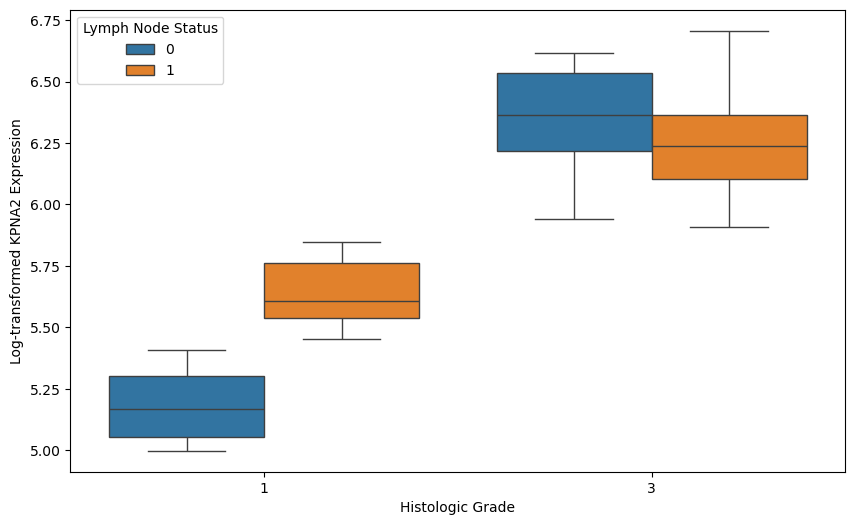

In [3]:
# Visualize KPNA2 expression by histologic grade and lymph node status
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='log_gene', hue='node', data=gene_table)
plt.xlabel('Histologic Grade')
plt.ylabel('Log-transformed KPNA2 Expression')
plt.legend(title='Lymph Node Status')
plt.show() 

We then model the logged gene expression as a function on tumor size, as well as a function of Grade, Node status and size. As a first check we investigate the residual errors of the predictor.

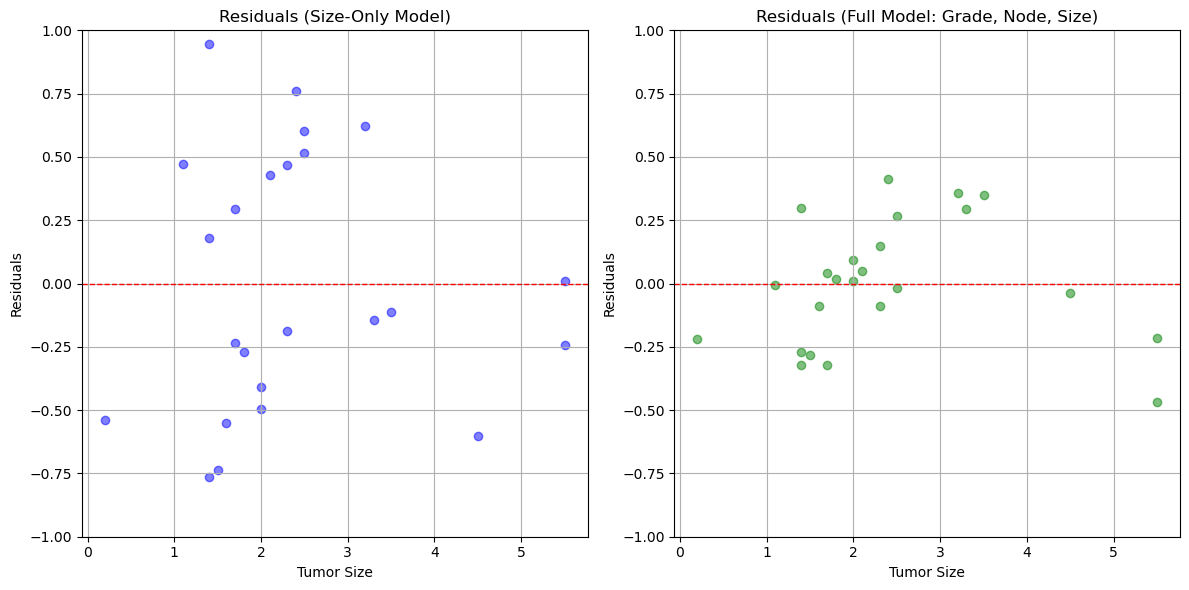

In [4]:
# Perform two regressions: one with only 'size' and another with 'grade', 'node', and 'size'

# Regression with only 'size' as the independent variable
y = gene_table['log_gene']
X_size = gene_table[['size']]
model_size = LinearRegression()
model_size.fit(X_size, y)
gene_table['predicted_log_gene_size'] = model_size.predict(X_size)

# Regression with 'grade', 'node', and 'size' as independent variables
X_all = gene_table[['grade', 'node', 'size']]
model_all = LinearRegression()
model_all.fit(X_all, y)
gene_table['predicted_log_gene_all'] = model_all.predict(X_all)

# Calculate residuals for both regression models

# Residuals for model with only 'size' as the independent variable
gene_table['residuals_size'] = gene_table['log_gene'] - gene_table['predicted_log_gene_size']

# Residuals for model with 'grade', 'node', and 'size' as independent variables
gene_table['residuals_all'] = gene_table['log_gene'] - gene_table['predicted_log_gene_all']

# Plot the residuals for both models
plt.figure(figsize=(12, 6))

# Residuals for size-only model
plt.subplot(1, 2, 1)
plt.scatter(gene_table['size'], gene_table['residuals_size'], color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Tumor Size')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.title('Residuals (Size-Only Model)')
plt.grid(True)

# Residuals for full model with grade, node, and size
plt.subplot(1, 2, 2)
plt.scatter(gene_table['size'], gene_table['residuals_all'], color='green', alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Tumor Size')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.title('Residuals (Full Model: Grade, Node, Size)')
plt.grid(True)

plt.tight_layout()
plt.show()

The errors are smaller when we apply the full model compared to the regression based only on tumor size. We also plot the predictions as a function of actual value.

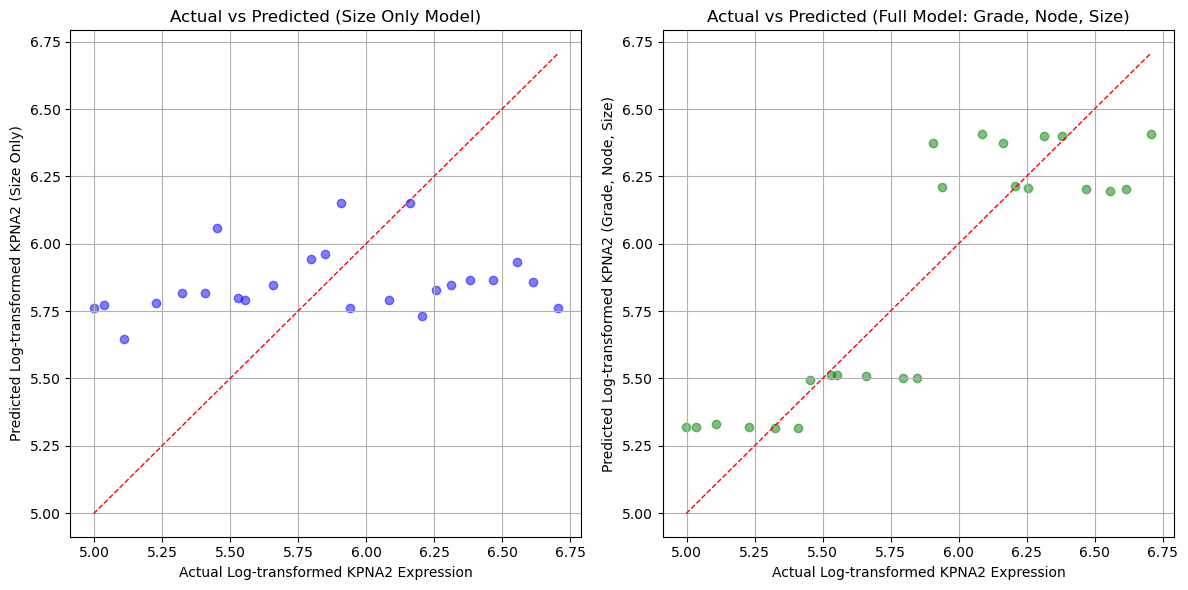

In [5]:
# Scatterplots of actual vs predicted log_gene values for both models

plt.figure(figsize=(12, 6))

# Scatterplot for size-only model predictions
plt.subplot(1, 2, 1)
plt.scatter(gene_table['log_gene'], gene_table['predicted_log_gene_size'], color='blue', alpha=0.5)
plt.plot([gene_table['log_gene'].min(), gene_table['log_gene'].max()], 
         [gene_table['log_gene'].min(), gene_table['log_gene'].max()], 
         'r--', linewidth=1)  # Line y=x for reference
plt.xlabel('Actual Log-transformed KPNA2 Expression')
plt.ylabel('Predicted Log-transformed KPNA2 (Size Only)')
plt.title('Actual vs Predicted (Size Only Model)')
plt.grid(True)

# Scatterplot for full model predictions
plt.subplot(1, 2, 2)
plt.scatter(gene_table['log_gene'], gene_table['predicted_log_gene_all'], color='green', alpha=0.5)
plt.plot([gene_table['log_gene'].min(), gene_table['log_gene'].max()], 
         [gene_table['log_gene'].min(), gene_table['log_gene'].max()], 
         'r--', linewidth=1)  # Line y=x for reference
plt.xlabel('Actual Log-transformed KPNA2 Expression')
plt.ylabel('Predicted Log-transformed KPNA2 (Grade, Node, Size)')
plt.title('Actual vs Predicted (Full Model: Grade, Node, Size)')
plt.grid(True)

plt.tight_layout()
plt.show()